### 삼성바이오로직스
#### 모멘텀 투자 전략
* 변동성이 큰 최근 투자 환경의 변화에따라
* 초 단기물과 단기물간의 변동폭을 활용하여 투자 전략구성

In [111]:
import cx_Oracle
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

### 데이터 베이스 연결
* Oracle RDBMS 사용
* 주가 정보 획득용 DB 연결

In [112]:
# 데이터 불러오기
uid='PROJECT1'
upw='Test1234'
url='localhost:1521/orcl'
conn=cx_Oracle.connect(uid,upw,url)
cursor=conn.cursor()

In [113]:
sql="select * from STSAMBA where SDATE>20190101 order by sdate asc"
cursor.execute(sql)
res=cursor.fetchall()
len(res)


402

### 기초 통계량 확인
* 평균,표준편차,사분위수

In [114]:
idx=["no","Date","OpenP","HighP","LowP","CloseP","vol","stat"]
df=pd.DataFrame(res,columns=idx)
ndf=df.loc[:,["OpenP","HighP","LowP","CloseP"]]
ndf.describe()# 기초통계량 확인

,OpenP,HighP,LowP,CloseP
count,402.000000,402.000000,402.000000,402.000000
mean,440134.328358,447904.228856,432949.004975,440278.606965
std,152970.049440,156230.974405,149189.791965,152706.005709
min,250500.000000,253000.000000,241500.000000,249500.000000
25%,320500.000000,327625.000000,317000.000000,321875.000000
50%,392500.000000,397000.000000,387000.000000,391750.000000
75%,495500.000000,500000.000000,487125.000000,494750.000000
max,846000.000000,863000.000000,814000.000000,843000.000000


### 그래프 분석
* 전체적 주가변동 그래프 확인

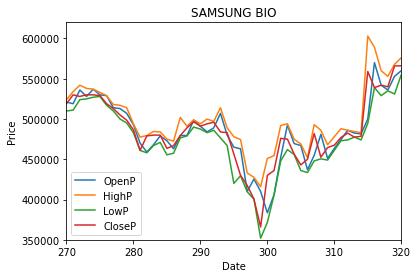

In [115]:
ndf.plot()
plt.title("SAMSUNG BIO")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xlim(270,320)
plt.ylim(350000,620000)
plt.legend()
plt.show()

### 단기 이동평균선 확인
* 해당 주식에 맞는 단기 이동 평균선 작성

In [116]:
#5일평균선
cp=df.loc[:,["CloseP"]]
mov5=[0,0,0,0]
sum=0
i=0
avg=0;
npCp=np.array(cp.values)

#npCp[:5]
#np.average(npCp[:5])


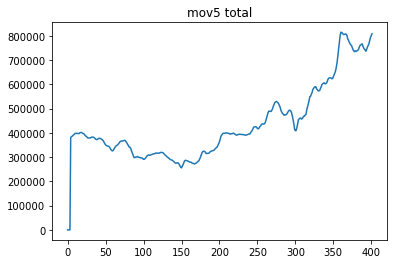

In [117]:
ans=[0,0,0,0]
for i in range(len(cp)-4):
    avg=np.average(npCp[i:i+5])
    ans.append(avg)
ans
plt.plot(ans)
plt.title("mov5 total")
plt.show()

In [118]:
df['mov5']=pd.Series(ans)
df.tail()

,no,Date,OpenP,HighP,LowP,CloseP,vol,stat,mov5
397,6026,20200810,768000,781000,756000,771000,177707,0,767800.0
398,6025,20200811,793000,832000,783000,804000,761446,0,781600.0
399,6024,20200812,815000,854000,814000,843000,760424,0,792800.0
400,6023,20200813,837000,844000,809000,820000,366305,0,801200.0
401,6022,20200814,815000,830000,791000,803000,143298,0,808200.0


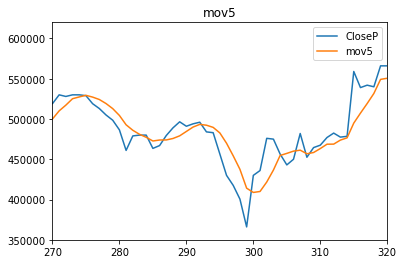

In [119]:
ndf=df.loc[:,["CloseP","mov5"]]
ndf.plot()
plt.title("mov5")
plt.xlim(270,320)
plt.ylim(350000,620000)
plt.show()

### 장기 이동평균선
* 해당 주식에 맞는 장기이동 평균선 제작

In [120]:
#20일 이평선
ans=[]
for i in range(19):
    ans.append(0)
    
for i in range(len(cp)-19):
    avg=np.average(npCp[i:i+20])
    ans.append(avg)
#ans


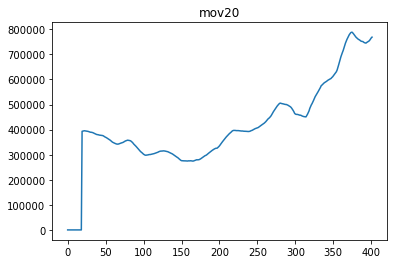

In [121]:
plt.plot(ans)
plt.title("mov20")
plt.show()

In [122]:
df['mov20']=pd.Series(ans)
df.tail()

,no,Date,OpenP,HighP,LowP,CloseP,vol,stat,mov5,mov20
397,6026,20200810,768000,781000,756000,771000,177707,0,767800.0,753400.0
398,6025,20200811,793000,832000,783000,804000,761446,0,781600.0,756850.0
399,6024,20200812,815000,854000,814000,843000,760424,0,792800.0,761550.0
400,6023,20200813,837000,844000,809000,820000,366305,0,801200.0,765950.0
401,6022,20200814,815000,830000,791000,803000,143298,0,808200.0,768950.0


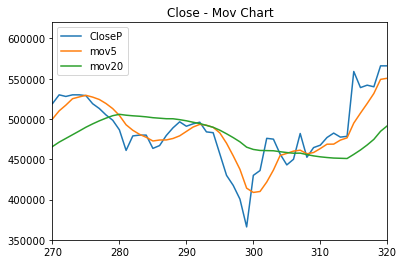

In [123]:
ndf=df.loc[:,["CloseP","mov5","mov20"]]
ndf.plot()
plt.title("Close - Mov Chart")
plt.xlim(270,320)
plt.ylim(350000,620000)
plt.show()

### 모멘텀 분석의 장점
* 단이평선이 장이평선 하단에 위치할 경우 주식을 보유하지 않고 있어서
* 급격한 주가 하락에 대한 방어적 요소가 강함
* 그중 5일물과 20일물의 비교 분석이 제일 좋은 성과를 가지고 있음
* 5-20 프로그래밍 매매 시뮬레이션 결과
* 방어적 성향의 보수적 이익 실현가능

In [124]:
# 1000만원 수익률 분석하기
mv5=df['mov5']
mv20=df['mov20']
cp=df['CloseP']
buysell=[]
bfStat=0
ans=[]
#초기화
inStock=0
myStock=[]
myBank=[]
baseMoney=10000000
movDay=20

for i in range(movDay):
    ans.append(0)
    myBank.append(baseMoney)
    myStock.append(0)
    

for i in range(movDay,len(mv5)):
    if(mv5[i]>mv20[i]):
        nowStat=1;
    else:
        nowStat=-1
        
    baseMoney=myBank[i-1]
    inStock=myStock[i-1]
    
    if(bfStat==-1):#단이평선이 아래
        if(nowStat==1):
            #print("매수")
            canBuy=baseMoney//cp[i]
            baseMoney-=canBuy*cp[i]
            # 계좌 잔고
            inStock=canBuy
            
            ans.append(1)
        else:
            #print("대기")
            ans.append(0)
    else:# 단이평선이 위에 있음
        if(nowStat==1):
            #print("대기")
            ans.append(0)
        else:
            if(inStock>0):
                baseMoney+=inStock*cp[i]
                # 주식 보유수
                inStock=0
                #print("매도")
                ans.append(-1)
            else: # 주식 보유 안할때
                #print("대기")
                ans.append(0)
    myStock.append(inStock)
    myBank.append(baseMoney);
    bfStat=nowStat 
    # 일이 마무리되면 현재상태가 과거상태로변환
        
ans[:100]    
df['timing']=pd.Series(ans)
df['myStock']=pd.Series(myStock)
df['myBank']=pd.Series(myBank)
# 통장잔고+ 주식수* 현재주식가치
df['price']=df['myBank']+df['myStock']*df['CloseP']
df['profit']=df['price']/10000000


In [125]:
df.tail()

,no,Date,OpenP,HighP,LowP,CloseP,vol,stat,mov5,mov20,timing,myStock,myBank,price,profit
397,6026,20200810,768000,781000,756000,771000,177707,0,767800.0,753400.0,0,31,17500,23918500,2.39185
398,6025,20200811,793000,832000,783000,804000,761446,0,781600.0,756850.0,0,31,17500,24941500,2.49415
399,6024,20200812,815000,854000,814000,843000,760424,0,792800.0,761550.0,0,31,17500,26150500,2.61505
400,6023,20200813,837000,844000,809000,820000,366305,0,801200.0,765950.0,0,31,17500,25437500,2.54375
401,6022,20200814,815000,830000,791000,803000,143298,0,808200.0,768950.0,0,31,17500,24910500,2.49105


### 분석결과
* 주가 하락시 상당히 좋은 포지션으로 주가하락을 방어하고 있다
* 조사 범위중 2군데정도 방어가 미흡한 부분이 보이는데
* 급격한 하락에 최선을 다한 것으로 보여진다.

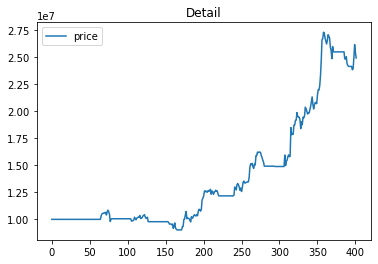

In [126]:
ndf=df.loc[:,['price']]
ndf.plot()
plt.title("Detail")
plt.show()